# Copyright : fast.ai - Jeremy Howard & Sylvain Gugger - 2020 (GPLv3)

Cellules de code et plan du notebook adaptées du livre :

[Deep Learning for Coders with fastai & PyTorch](https://github.com/fastai/fastbook) de Jeremy Howard et Sylvain Gugger.

The code in the original notebooks (and thus the code in this notebook) is covered by the GPL v3 license; see the [LICENSE file](https://github.com/fastai/fastbook/blob/master/LICENSE) for details.

# Les applications du Deep Learning

Pour chaque exemple, identifier :
- quelles données on fournit en entrée ?
- quel résultat on prédit en sortie ?

## Entrainer votre premier modèle : chat ou chien ?

[The Oxford-IIIT Pet Dataset](https://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf) Omkar M Parkhi and Andrea Vedaldi and Andrew Zisserman and C. V. Jawahar

In [1]:
from fastai2.vision.all import *

# Télécharger un jeu de données
path = untar_data(URLs.PETS)/'images'

# Annoter les données avec le résultat attendu
def is_cat(x): return x[0].isupper()

# Charger les données et les résultats en mémoire
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

# Choisir une famille de modèle et une métrique à observer
learn = cnn_learner(dls, resnet34, metrics=error_rate)

# Entrainer le modèle
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.155975,0.020632,0.006766,00:26


epoch,train_loss,valid_loss,error_rate,time
0,0.074769,0.037748,0.009472,00:29


## Tester le modèle entrainé

In [2]:
import ipywidgets as widgets

uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [3]:
# Charger un exemple de test
img = PILImage.create(uploader.data[0])

# Utiliser le modèle pour prédire un résultat
is_cat_pred,_,probs = learn.predict(img)

# Afficher le résultat
print(f"Is this a cat?: {is_cat_pred}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 0.999994


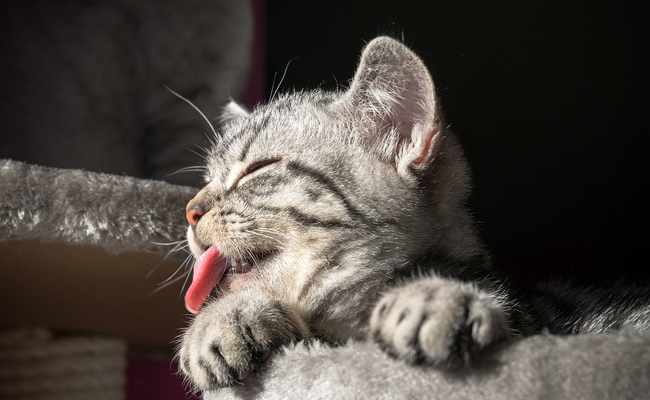

In [4]:
img

## Examiner les données en entrée et en sortie

In [5]:
files = get_image_files(path)
files

(#7390) [Path('/storage/data/oxford-iiit-pet/images/american_bulldog_146.jpg'),Path('/storage/data/oxford-iiit-pet/images/japanese_chin_12.jpg'),Path('/storage/data/oxford-iiit-pet/images/Sphynx_247.jpg'),Path('/storage/data/oxford-iiit-pet/images/beagle_158.jpg'),Path('/storage/data/oxford-iiit-pet/images/beagle_76.jpg'),Path('/storage/data/oxford-iiit-pet/images/shiba_inu_207.jpg'),Path('/storage/data/oxford-iiit-pet/images/Siamese_56.jpg'),Path('/storage/data/oxford-iiit-pet/images/keeshond_194.jpg'),Path('/storage/data/oxford-iiit-pet/images/miniature_pinscher_89.jpg'),Path('/storage/data/oxford-iiit-pet/images/leonberger_42.jpg')...]

In [6]:
is_cat(files[0].name),is_cat(files[2].name)

(False, True)

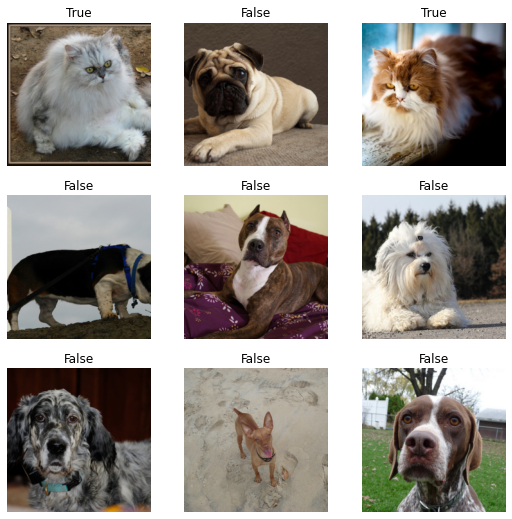

In [7]:
dls.show_batch()

In [8]:
learn.predict(img)

('True', tensor(1), tensor([6.2638e-06, 9.9999e-01]))

## Autre exemple : segmentation d'image pour voiture autonome

In [9]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.225533,2.656588,00:05


epoch,train_loss,valid_loss,time
0,2.046867,1.716002,00:02
1,1.735477,1.242454,00:02
2,1.533882,1.159227,00:02
3,1.386283,0.967271,00:02
4,1.250767,0.934665,00:02
5,1.134250,0.785681,00:02
6,1.032453,0.784746,00:02
7,0.952259,0.761520,00:02


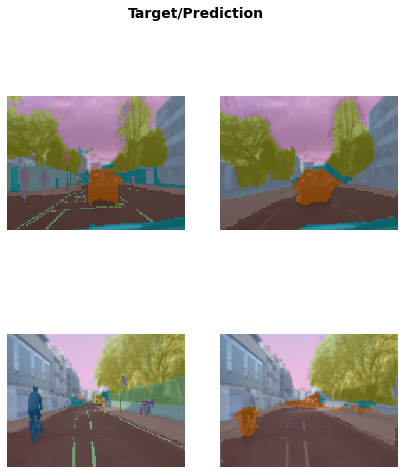

In [10]:
learn.show_results(max_n=6, figsize=(7,8))

## Langage naturel (NLP) : Analyse de sentiment sur les critiques de films

In [11]:
from fastai2.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.584232,0.402528,0.820640,02:39


epoch,train_loss,valid_loss,accuracy,time
0,0.304087,0.261654,0.895080,05:00
1,0.209176,0.226163,0.907760,04:55
2,0.166885,0.198297,0.922920,04:57
3,0.139211,0.197101,0.927320,05:03


Si vous obtenez une "erreur CUDA out of memory" après avoir lancé cette cellule, cliquez sur le menu Kernel, puis redémarrez. Au lieu d'exécuter la cellule ci-dessus, copiez et collez le code suivant dans cette cellule:

```
from fastai2.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=32)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)
```

Cela réduit la taille de batch à 32 (nous expliquerons cela plus tard). Si vous continuez à obtenir la même erreur, changez 32 par 16.

In [12]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([0.0022, 0.9978]))

## Données tabulaires (structurées) : Prédiction du salaire

In [13]:
from fastai2.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [14]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.357933,0.355810,0.833999,00:15
1,0.349653,0.347597,0.839681,00:15
2,0.339088,0.344107,0.841370,00:14


## Recommandations de films à des utilisateurs

In [15]:
from fastai2.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.526995,1.403439,00:01


epoch,train_loss,valid_loss,time
0,1.364174,1.344157,00:01
1,1.250393,1.163688,00:01
2,1.016642,0.870731,00:01
3,0.786737,0.744992,00:01
4,0.682970,0.718922,00:01
5,0.636977,0.712652,00:01
6,0.621173,0.710614,00:01
7,0.602182,0.708898,00:01
8,0.598256,0.708601,00:01
9,0.606156,0.708454,00:01


In [16]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,59.0,55.0,4.5,4.684388
1,1.0,44.0,1.0,3.002353
2,49.0,95.0,4.0,4.381668
3,16.0,71.0,5.0,4.114184
4,59.0,28.0,4.0,3.442972
5,39.0,36.0,3.0,3.748619
6,42.0,44.0,4.5,3.156165
7,89.0,68.0,3.0,3.625170
8,94.0,66.0,3.5,3.996697


## Une liste des applications - avec un vocabulaire spécifique


[Papers with code - State of the art - Browse Tasks](https://paperswithcode.com/sota)

## Qu'est-ce que le machine learning ?

Des données exemples et des fonctions mathématiques :
- des données en entrée => converties dans un format numérique
- des exemples de résultats attendus en sortie (**labels**) => convertis dans un format numérique 
- **une fonction mathématique infiniment flexible**, dont la forme est modifiée par un ensemble de **paramètres ajustables** 
  - cette fonction paramétrable (**modèle**) calcule des prédictions
- **une mesure d'erreur** qui quantifie l'écart entre les prédictions calculées et les résultats attendus
- un mécanisme efficace pour déterminer comment modifier chaque paramètre pour diminuer l'erreur (**optimisation**)

Un processus itératif et automatique :
0. Initialisation des paramètres du modèle au hasard
1. Utilisation du modèle pour calculer des prédictions
2. Mesure de l'erreur de prédiction par rapport aux résultats attendus
3. Identification des modifications à appliquer aux paramètres pour diminuer un peu l'erreur (le coût = **loss**)
4. Application de ces modifications aux paramètres : la forme de la fonction se rapproche un peu plus de la forme attendue
5. Retour au point 1 tant que l'erreur diminue

Exemples de jargon :

Epoques (**epochs**) : nombre de fois qu'on passe en revue l'ensemble des données.

Stochastic gradient descent (**SGD**) : nom mathématique donné au processus décrit ci-dessus.

Deux temps bien distincts :
- **entrainement** : le jeu de données est fixe, les paramètres varient
- prodution - **inférence** : le jeu de donnée varie, les paramètres sont fixes

## Quelles sont les limitations du machine learning ?

OBJECTIF : faire des prédictions de bonne qualité sur des exemples jamais vus à l'entrainement
- quel est le résultat attendu sur un exemple jamais vu à l'entrainement ?
- est-ce que tous les cas possibles ont été vus à l'entrainement ?
- est-ce que les motifs identifiés par le modèle dans les données d'entrainement restent signitifcatifs en production ?
- est-ce que le système n'est pas sur-spécialisé par rapports aux spécifités des cas d'entrainement ?
- est-ce que le système modélisé n'a pas évolué depuis la phase d'entrainement ?

DYNAMIQUE de l'entrainement :
- on spécialise les paramètres un peu plus à chaque itération pour "prendre la forme" des exemples d'entrainement
- l'erreur diminue mais on risque de devenir tellement spécialisé qu'on devient moins bon sur des exemples jamais vus
- ce risque de sur-spécialisation (**overfitting**) représente un grand danger pour la performance du modèle entrainé

Plusieurs jeux de données :
- exemples d'**entrainement** : **spécifications** fournies au processus de machine learning
- exemples de **validation** : jamais vus par le processus de machine learning, utilisés par le data scientist pour évaluer la capacité de généralisation du modèle, puis pour ajuster l'architecture du modèle afin d'améliorer les résultats
- exemples de **test** : données utilisées uniquement en fin de processus, en aveugle pour le data scientist, pour se prémunir d'un risque de sur-spécialisation de l'architecture par rapport aux exemples (entrainement + validation)

ETHIQUE et biais :
- calcule des prédictions, ne décide pas d'actions : toujours inséré dans un système plus large
- nécessite de nombreux exemples annotés, qui peuvent être coûteux à produire
- risque de propager les biais des personnes, de l'environnement qui ont entrainé le système (repoduit le mauvais exemple)
- boucle d'amplification d'un phénomène (prédictions auto-réalisatrices)